In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *

In [2]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/cars.xlsx')
my_pretty_table(origin.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None

데이터프레임 상위 5개 행
+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
|  0 |       4 |      2 |
|  1 |       4 |     10 |
|  2 |       7 |      4 |
|  3 |       7 |     22 |
|  4 |       8 |     16 |
+----+---------+--------+

데이터프레임 하위 5개 행
+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
| 45 |      24 |     70 |
| 46 |      24 |     92 |
| 47 |      24 |     93 |
| 48 |      24 |    120 |
| 49 |      25 |     85 |
+----+---------+--------+

기술통계
+-------+---------+--------+---------+-------+-------+-------+-------+-------+-------+
|       |   count |   mean |     std |   min |   25% |   50% |   75% |   max |   nan |
|-------+---------+--------+--

## #02. 탐색적 데이터 분석

### [1] 산점도 그래프 시각화

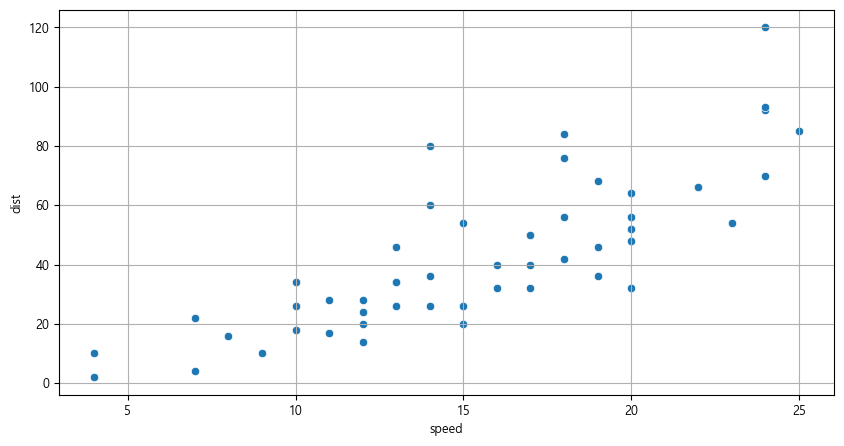

In [3]:
my_scatterplot(origin, 'speed', 'dist', figsize=(10,5),dpi=100)

## #03. 단순선형회귀의 경우

> 여기서는 좀 더 높은 설명력을 얻기 위해 데이터를 분할하지 않고 훈련데이터에 대해서만 score를 얻도록 함

### (1) 회귀모형 생성

In [4]:
fit = my_linear_regrassion(origin[['speed']], origin['dist'], use_plot=False, report=False)

[회귀식]
dist = 3.932 * speed + -17.579

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.651079 |             11.5801 |              227.07 |          15.0689 |                         38.3688 |              -8.28381 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+


### 실제 데이터와 예측치 시각화

c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


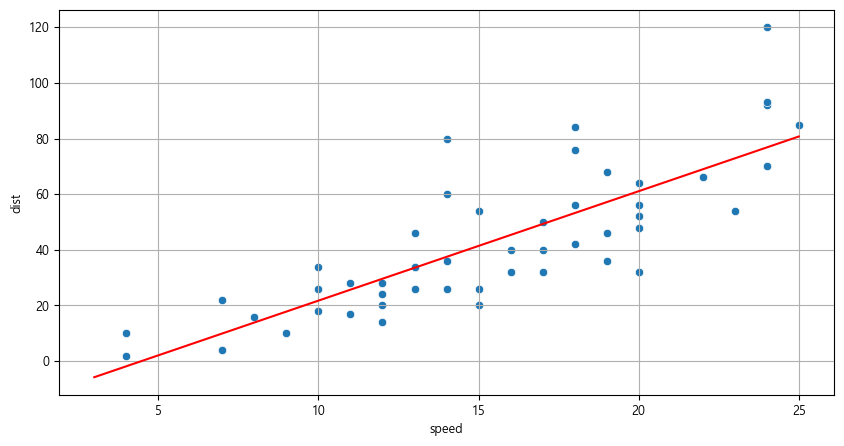

In [5]:
plt.figure(figsize=(10,5), dpi=100)

sb.scatterplot(x='speed', y='dist', data=origin)

xmin, xmax = plt.xlim()
xrange = np.arange(xmin.round(), xmax.round())
y_pred = fit.predict(xrange.reshape(-1,1))
sb.lineplot(x=xrange, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()

## #04. 다항회귀의 경우

### [1] 독립변수에 대한 2차항을 추가

In [6]:
df = origin.copy()
df['speed2'] = df['speed'] ** 2
my_pretty_table(df.head())

+----+---------+--------+----------+
|    |   speed |   dist |   speed2 |
|----+---------+--------+----------|
|  0 |       4 |      2 |       16 |
|  1 |       4 |     10 |       16 |
|  2 |       7 |      4 |       49 |
|  3 |       7 |     22 |       49 |
|  4 |       8 |     16 |       64 |
+----+---------+--------+----------+


### [2] 다중선형회귀 적용

In [7]:
x = df[['speed', 'speed2']]
y = df['dist']
fit = my_linear_regrassion(x, y, use_plot=False, report=True)

[회귀식]
dist = 0.913 * speed + 0.100 * speed2 + 2.470

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.667331 |             11.1069 |             216.494 |          14.7137 |                         38.3075 |              -19.5827 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------+------------+--------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |     t |   유의확률 |    VIF |
|----+---

### [3] 결과 시각화

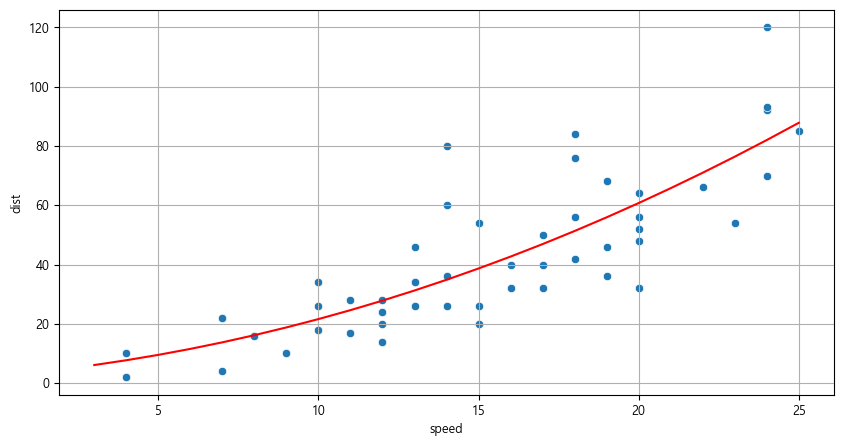

In [8]:
plt.figure(figsize=(10,5), dpi=100)

sb.scatterplot(x = 'speed', y= 'dist', data=df)

xmin, xmax = plt.xlim()
xrange = np.arange(xmin.round(), xmax.round())
xrange2 = xrange ** 2
xdf = DataFrame({'speed': xrange, 'speed2': xrange2})
y_pred = fit.predict(xdf)
sb.lineplot(x=xrange, y=y_pred, color='red')


plt.grid()
plt.show()
plt.close()
